# More on Linear Regression

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import math
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

import scipy as sp
import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr
from scipy.spatial.distance import pdist, squareform

import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.utils as utils
import sklearn.linear_model as linear_model
import sklearn.model_selection as model_selection
import sklearn.cluster as cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from patsy import dmatrices

import seaborn as sns

print('')

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

## Measuring the fit of a regression model

Given any $x$ and $y$, a linear regression algorithm produces an output $\hat{\beta}$. But how do we measure the quality of this model? In particular, is there some way to characterize quality using a single value (note that this means it is possible to compare or rank different models by comparing their individual associated values).

In prediction problems, the ultimate measure of success is "out-of-sample accuracy": how well does $\hat \beta$ predict $y$ from $x$ on __fresh examples__? We can measure that by using a holdout, or via cross-validation.

However, other measures are often used, either because:
- they are simpler/easier to measure than out-of-sample error, or
- they help us evaluate our model (and point us towards alternatives).

One straightforward way to quantify how well the model fits the data is to treat the individual predicted values (one for each data set entry) as each belonging to a dimension in a vector space. Note that the number of dimensions in this vector space does *not* correspond to the number of features, but to the number of data set entries. We can then compute the distance between the vector of observed values and the vector values predicted by the model. This is sometimes called the **root mean square error** (RMSE):

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(y_i-\hat{y_i}\right)^2} = \frac{\sqrt{\sum_{i=1}^n \left(y_i-\hat{y_i}\right)^2}}{\sqrt{n}} = \frac{\|y - \hat{y}\|}{\sqrt{n}}.$$

The RMSE is an absolute measure of how well the model fits the data. The RMSE can be interpreted as the standard deviation of the unexplained variance, and has the same units as the observed variable.

The RMSE helps us see how much predictions deviate on average from the actual values in the dataset. Lower values of RMSE indicate a better fit. However, this also means that the RMSE is not bounded and its absolute magnitude depends on the units of the data.

A common measure of fit that is **bounded** is $R^2$. $R^2$ measures the fraction of the variance of $y$ that can be explained by the model $x\hat{\beta}$.

The variance of $y$ is $\text{Var}(y) =\frac{1}{n} \sum_{i=1}^n \left(y_i-\overline{y}\right)^2$
where $\overline{y}=\frac{1}{n}\sum_{i=1}^ny_i$.

For any given $n$, we can equally work with just what is known as the **total sum of squares** (TSS):

$$\text{TSS} = \sum_{i=1}^n \left(y_i-\overline{y}\right)^2$$

Now to measure the quality of fit of a model, we break TSS down into two components. 

For any given $x_i$, the prediction made by the model is $\hat{y_i} = x_i^T\beta$.

Therefore, the residual $\epsilon$ is $y - \hat{y}$, and the part that the model "explains" is $\hat{y_i} - \overline{y}.$

Then it turns out that the total sum of squares is exactly equal to the sum of squares of the residuals plus the sum of squares of the explained part.

In other words:

$$\text{TSS} = \text{RSS} + \text{ESS},$$

where residual sum of squares (RSS) is:

$$\text{RSS} = \sum_{i=1}^n \left(y_i-\hat{y_i}\right)^2,$$

and explained sum of squares (ESS) is:

$$\text{ESS} = \sum_{i=1}^n \left(\hat{y_i}-\overline{y}\right)^2,$$

Now, a good fit is one in which the model explains a large part of the variance of $y$.  

So the measure of fit $R^2$ is defined as:

\begin{eqnarray}
R^2 & = & \frac{\text{ESS}}{\text{TSS}} = 1-\frac{\text{RSS}}{\text{TSS}}
\end{eqnarray}


Note that it is the case that $0\leq R^2\leq 1$; the closer the value of $R^2$ is to $1$ the better the fit of the regression. Small values of RSS imply that the *residuals* are small and therefore we have a better fit.

## OLS in Practice

In [3]:
(X, y) = datasets.make_regression(n_samples=100, n_features=20, n_informative=5, bias=0.1, noise=30, random_state=1)
print(X.shape, y.shape)

(100, 20) (100,)


In [4]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     123.8
Date:                Thu, 01 Nov 2018   Prob (F-statistic):           1.03e-51
Time:                        10:42:36   Log-Likelihood:                -468.30
No. Observations:                 100   AIC:                             976.6
Df Residuals:                      80   BIC:                             1029.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            12.5673      3.471      3.620      0.0

The $R^2$ value is close to $1$. We can see that the linear model does a good job of predicting the observations $y_i$ __on the data__.

### Confidence intervals and significance

However, some of the independent variables may not contribute to the accuracy of the prediction. 

Note that each parameter of an independent variable has an associated confidence interval. If a coefficient is not distinguishable from zero, then we cannot assume that there is any relationship between the independent variable and the observations.

In other words, __if the confidence interval for the parameter includes zero,__ the associated independent variable may not have any predictive value.

In [5]:
print('Confidence Intervals: \n {}'.format(results.conf_int()))
print('Parameters: {}'.format(results.params))

Confidence Intervals: 
 [[  5.65891465  19.47559281]
 [ -9.44032559   1.77614877]
 [ -9.31636359   4.47701749]
 [ -4.12661379   8.15524508]
 [ -9.4808662    4.22965424]
 [ -5.49698033   7.07574692]
 [-10.22359973   4.08684835]
 [ 83.74738375  96.52928603]
 [ -6.77896356   6.75226985]
 [  8.80365396  21.73126149]
 [ -6.86882065   6.4194618 ]
 [ -6.97868351   7.1332267 ]
 [ -6.71228582   6.2218515 ]
 [ 82.96557061  97.07028228]
 [ -5.74782503   9.08465366]
 [ -1.06173893   9.85081724]
 [  2.02753258  15.5561241 ]
 [ 66.56165458  80.19256546]
 [ -8.90825108   5.0804296 ]
 [ -7.85545335   5.21424811]]
Parameters: [ 1.25672537e+01 -3.83208841e+00 -2.41967305e+00  2.01431564e+00
 -2.62560598e+00  7.89383294e-01 -3.06837569e+00  9.01383349e+01
 -1.33468527e-02  1.52674577e+01 -2.24679428e-01  7.72715974e-02
 -2.45217158e-01  9.00179264e+01  1.66841432e+00  4.39453916e+00
  8.79182834e+00  7.33771100e+01 -1.91391074e+00 -1.32060262e+00]


In [6]:
CIs = results.conf_int()
print(type(CIs))
notSignificant = (CIs[:,0] < 0) & (CIs[:,1] > 0)
for i in notSignificant:
    print(i)

<class 'numpy.ndarray'>
False
True
True
True
True
True
True
False
True
False
True
True
True
False
True
True
False
False
True
True


In [7]:
Xsignif = X[:,~notSignificant]
Xsignif.shape

(100, 6)

By eliminating independent variables that are not significant, we help avoid overfitting (since the model no longer needs to account for the noise represented by those variables).

In [8]:
model = sm.OLS(y, Xsignif)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     437.1
Date:                Thu, 01 Nov 2018   Prob (F-statistic):           2.38e-66
Time:                        10:42:38   Log-Likelihood:                -473.32
No. Observations:                 100   AIC:                             958.6
Df Residuals:                      94   BIC:                             974.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.9350      3.162      3.775      0.0

### An example of  overfitting

To get an idea of the limitations of $R^2$, lets push OLS to its limits by picking a problem where the number of dimensions is not much smaller than the size of the training set.

In [9]:
(Xbig, ybig) = datasets.make_regression(n_samples=200, n_features=100, n_informative=30, bias=0.1, noise=30, random_state=1)
print(Xbig.shape, ybig.shape)

(200, 100) (200,)


In [10]:
# Split into training and test sets.
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(Xbig, ybig, test_size=0.4)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 100) (120,)
(80, 100) (80,)


In [11]:
model_naive = sm.OLS(y_train, X_train)
results_naive = model_naive.fit()
print(results_naive.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     231.8
Date:                Thu, 01 Nov 2018   Prob (F-statistic):           1.37e-20
Time:                        10:42:39   Log-Likelihood:                -446.71
No. Observations:                 120   AIC:                             1093.
Df Residuals:                      20   BIC:                             1372.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2749      5.196      0.245      0.8

In [12]:
errors_train = y_train - X_train @ results_naive.params
errors_test = y_test - X_test @ results_naive.params
RMSE_linear_training = np.linalg.norm(errors_train / math.sqrt(len(errors_train)))
RMSE_linear_test = np.linalg.norm(errors_test / math.sqrt(len(errors_test)))
print("Training RMSE is " + str(RMSE_linear_training))
print("Test RMSE is " + str(RMSE_linear_test))

Training RMSE is 10.010433628621835
Test RMSE is 78.61226244360478


Even though $R^2$ is very high, the least-squares model is overfitting dramatically. 

One solution is to use __regularization__ to help select a more useful model. 

The idea is to add a penalty term to the loss function which is large for more complicated models. In this particular case, the "Lasso" loss makes sense. The idea is to find a vector $\beta$ that minimizes

$$ \frac{1}{ 2n} \|y - X\beta\|^2_2 + \alpha \|\beta\|_1$$

where $\|\cdot\|_2$ is the Euclidean norm, and $\|\beta\|_1$ is the sum of the absolute values of the coefficients. 

The parameter $\alpha$ here allows us to tune the strength of the penalty term. Larger $\alpha$ means a larger penalty. Let's try a range of different values of $\alpha$ to see what happens. 


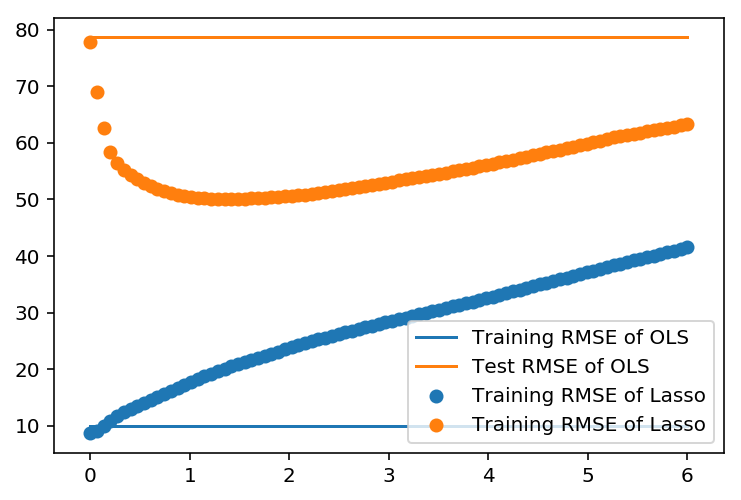

In [13]:
alphas_to_try = np.linspace(start = 0.001, stop = 6, num = 90)
RMSEs_train = []
RMSEs_test = []
for this_alpha in alphas_to_try:
    model_regularized = linear_model.Lasso(alpha = this_alpha)
    results_reg = model_regularized.fit(X_train, y_train)
    errors_train = y_train - results_reg.predict(X_train)
    errors_test = y_test - results_reg.predict(X_test)
    RMSEs_train.append(np.linalg.norm(errors_train / math.sqrt(len(errors_train))))
    RMSEs_test.append(np.linalg.norm(errors_test / math.sqrt(len(errors_test))))

plt.scatter(alphas_to_try, RMSEs_train, label="Training RMSE of Lasso")
plt.scatter(alphas_to_try, RMSEs_test, label="Training RMSE of Lasso")
plt.plot(alphas_to_try, np.ones(len(alphas_to_try))* RMSE_linear_training, label = "Training RMSE of OLS")
plt.plot(alphas_to_try, np.ones(len(alphas_to_try))* RMSE_linear_test, label = "Test RMSE of OLS")
plt.legend(loc = 'lower right')

For really tiny values of $\alpha$, the Lasso is doing the same thing as regular least squares, since the penalty term is too small to matter. 

As $\alpha$ increases, the training error gets __worse__, but the test error gets __better__!

Even for the best setting of $\alpha$, though, the training error is better than the test error, but their _difference_ (called the __generalization error__) gets smaller as $\alpha$ increases. 

The value of $\alpha$ is normally selected by cross-validation. There are fairly sophisticated algorithms for doing this efficiently without re-fitting the model from scratch many times. 

## Real data: California housing

In [14]:
ca = pd.read_table("cal_housing.data", sep=',')
# may be from here: http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html
# Block groups in California from 1990 Census.
# medianIncome is given as log
attributes = ['longitude',
            'latitude',
            'housingMedianAge',
            'totalRooms',
            'totalBedrooms',
            'population',
            'households',
            'medianIncome',
            'medianHouseValue']

ca.columns = attributes

ca.info()
ca.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20639 entries, 0 to 20638
Data columns (total 9 columns):
longitude           20639 non-null float64
latitude            20639 non-null float64
housingMedianAge    20639 non-null float64
totalRooms          20639 non-null float64
totalBedrooms       20639 non-null float64
population          20639 non-null float64
households          20639 non-null float64
medianIncome        20639 non-null float64
medianHouseValue    20639 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
5,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
6,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
7,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
8,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0
9,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0


Complete dataset shape is (20639, 8)
Sample median house values:
0    358500.0
1    352100.0
2    341300.0
3    342200.0
4    269700.0
Name: medianHouseValue, dtype: float64


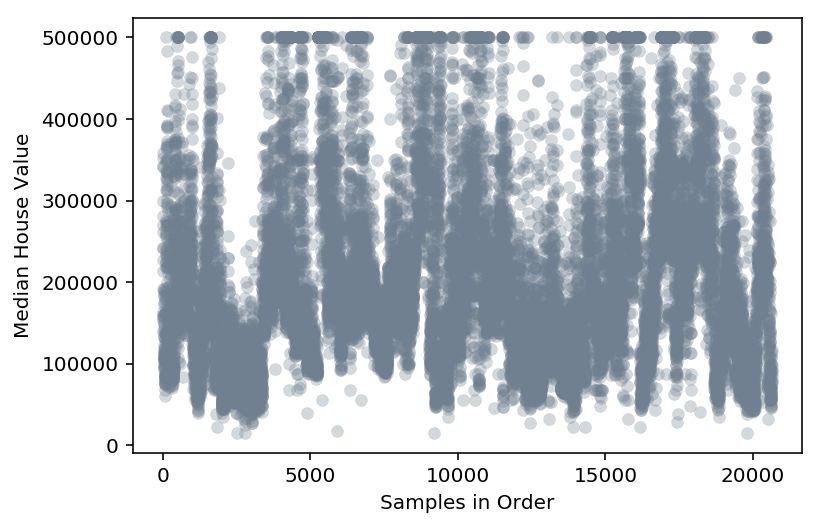

In [15]:
%matplotlib inline
X_CA_H = ca[['longitude','latitude','housingMedianAge','totalRooms',
             'totalBedrooms','population','households','medianIncome']]
print('Complete dataset shape is {}'.format(X_CA_H.shape))
print('Sample median house values:')
print(ca.medianHouseValue.head())
y_CA_H = ca.medianHouseValue;
plt.scatter(range(len(y_CA_H)), y_CA_H, c="slategray", alpha=0.3, linewidths=0.2)
plt.xlabel('Samples in Order')
plt.ylabel('Median House Value');

Clearly, we should shuffle the data before splitting it into train and test sets.

In [16]:
X_CA_H, y_CA_H = utils.shuffle(X_CA_H, y_CA_H, random_state=1)
X_CA_H_train, X_CA_H_test, y_CA_H_train, y_CA_H_test = model_selection.train_test_split(
    X_CA_H, y_CA_H, test_size=0.4, random_state=0)
print((X_CA_H_train.shape), y_CA_H_train.shape)
print((X_CA_H_test.shape), y_CA_H_test.shape)

(12383, 8) (12383,)
(8256, 8) (8256,)


17929   -121.96
5579    -118.30
7206    -118.18
12271   -116.99
12254   -117.02
8054    -118.18
17197   -119.75
1435    -122.01
193     -122.25
7964    -118.19
Name: longitude, dtype: float64


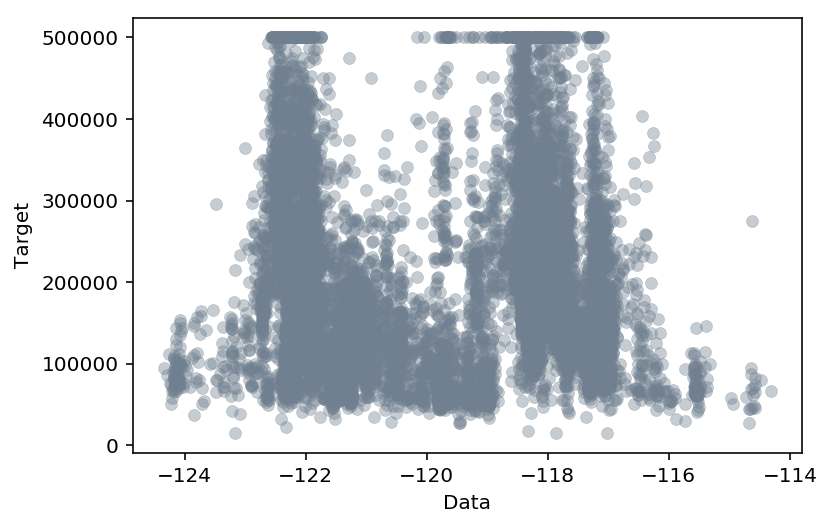

In [17]:
print(X_CA_H_train[X_CA_H_train.columns[0]].head(10))
subX_train = X_CA_H_train['longitude']
subX_test = X_CA_H_test[X_CA_H_test.columns[0]]
plt.scatter(subX_train, y_CA_H_train, c="slategray", alpha=0.4, linewidths=0.3)
# plt.scatter(subX_test, y_CA_H_test, c="seagreen", alpha=0.2, linewidths=0.3)
plt.xlabel('Data')
plt.ylabel('Target');

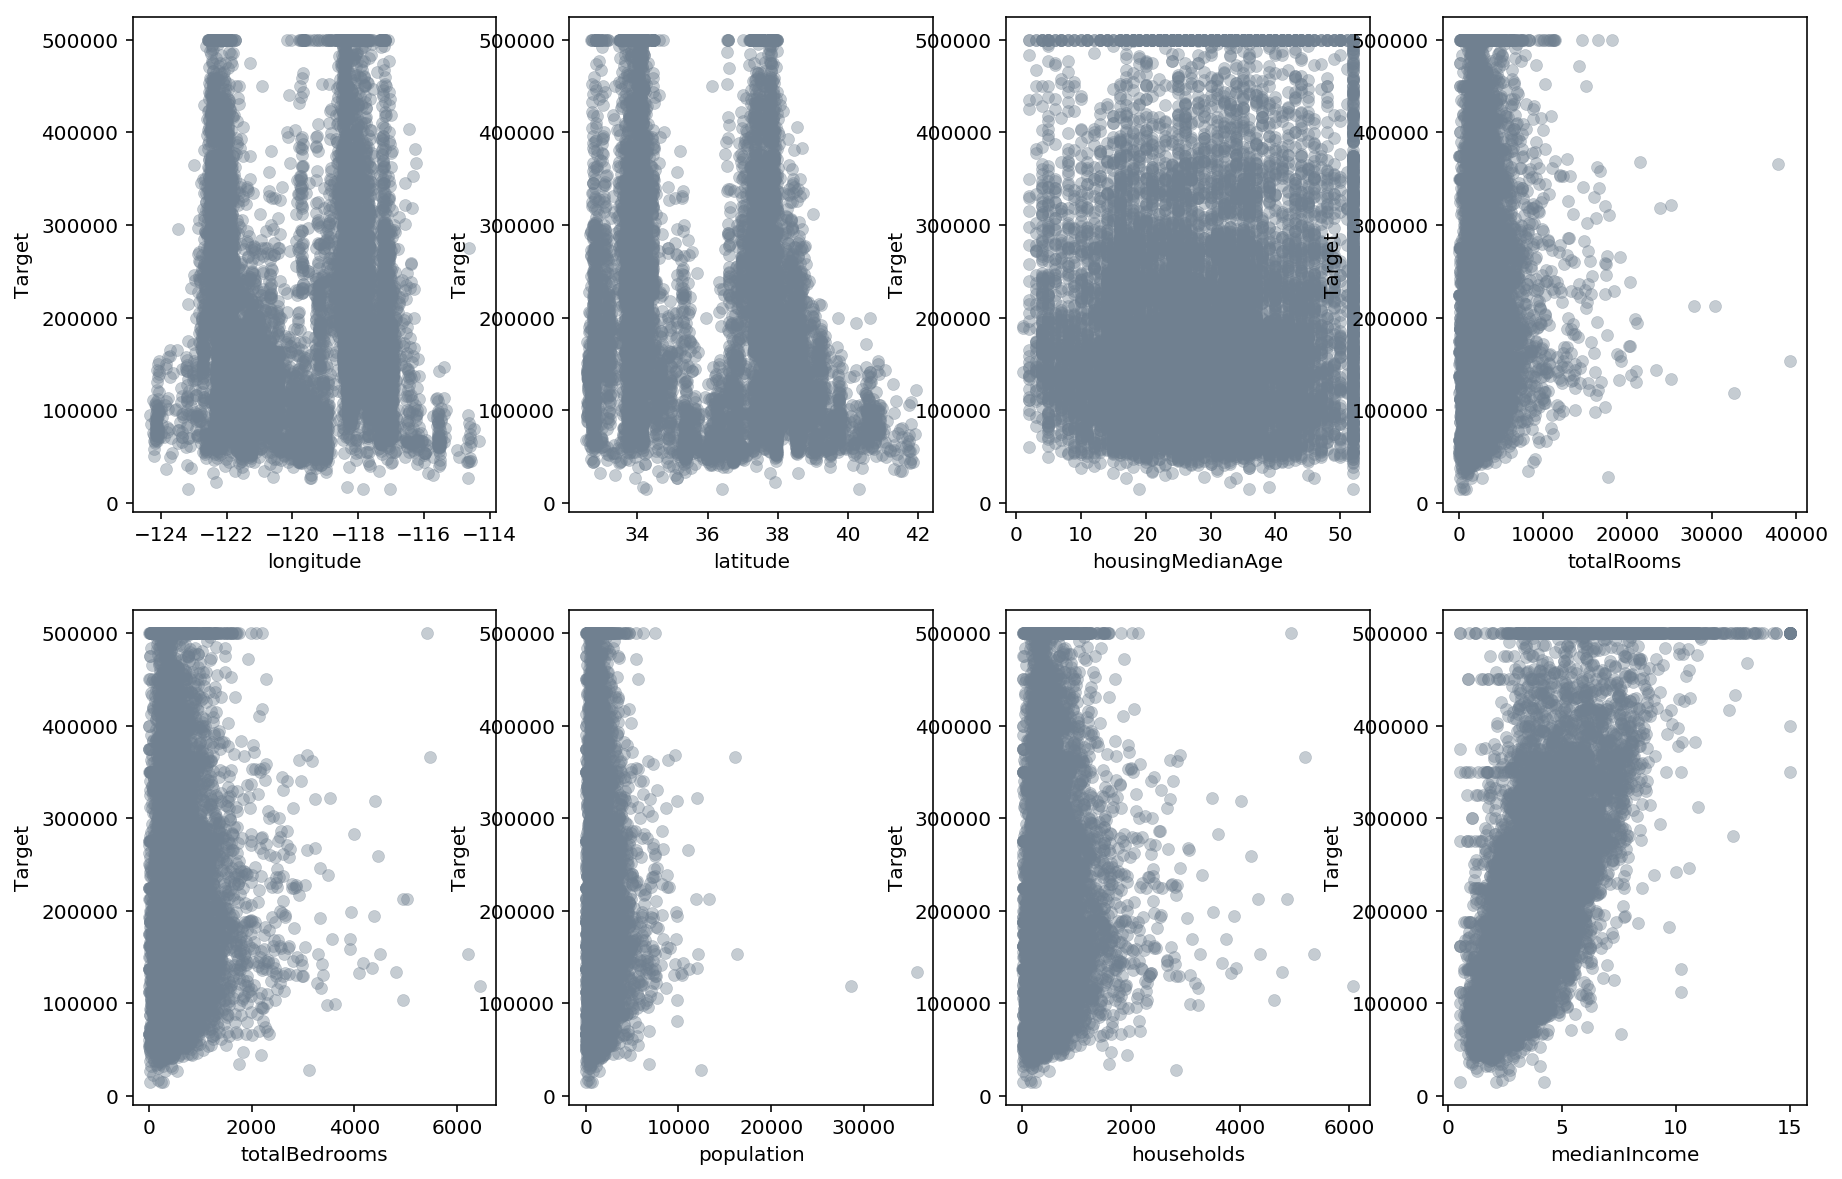

In [18]:
fig, axes = plt.subplots(2,4,figsize=(15,10))

for i in range(8):
    plt_i = i // 4
    plt_j = i % 4
    subX_train = X_CA_H_train.iloc[:,i]
    # plt.subplot(2, 4, 1 + i)
    axes[plt_i][plt_j].scatter(subX_train, y_CA_H_train, c="slategray", alpha=0.4, linewidths=0.3)
    #plt.scatter(subX_test, y_test)
    axes[plt_i][plt_j].set_xlabel(X_CA_H_train.columns[i])
    axes[plt_i][plt_j].set_ylabel('Target'); 

In [19]:
model = sm.OLS(y_CA_H_train, X_CA_H_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       medianHouseValue   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.393e+04
Date:                Thu, 01 Nov 2018   Prob (F-statistic):               0.00
Time:                        10:42:48   Log-Likelihood:            -1.5658e+05
No. Observations:               12383   AIC:                         3.132e+05
Df Residuals:                   12375   BIC:                         3.132e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
longitude        -2146.8860    140.225  

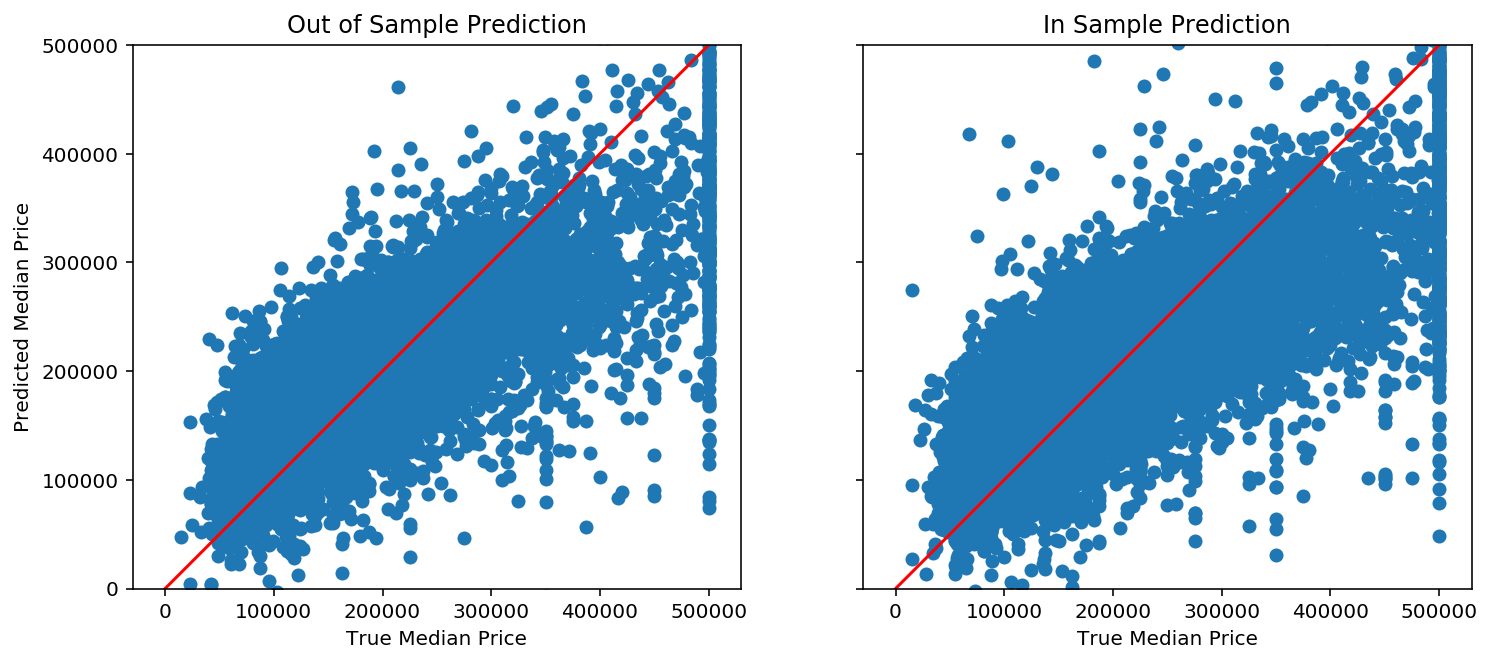

In [20]:
%matplotlib inline 
fig, (ax1, ax2) = plt.subplots(1,2,sharey = 'row',figsize=(12,5))
y_oos_predict = results.predict(X_CA_H_test)
ax1.scatter(y_CA_H_test, y_oos_predict)
ax1.set_xlabel('True Median Price')
ax1.set_ylabel('Predicted Median Price')
ax1.plot([0,500000],[0,500000],'r-')
ax1.axis('equal')
ax1.set_ylim([0,500000])
ax1.set_xlim([0,500000])
ax1.set_title('Out of Sample Prediction')
#
y_is_predict = results.predict(X_CA_H_train)
ax2.scatter(y_CA_H_train, y_is_predict)
ax2.set_xlabel('True Median Price')
ax2.plot([0,500000],[0,500000],'r-')
ax2.axis('equal')
ax2.set_ylim([0,500000])
ax2.set_xlim([0,500000])
ax2.set_title('In Sample Prediction');